In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
df = pd.read_csv("uber.csv")  # dataset from Kaggle
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [30]:
df = df.dropna()  # remove missing values
df = df[df['fare_amount'] > 0]  # remove negative fares
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)]  # valid coordinates only

In [31]:
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth’s radius in km
    return km

In [32]:
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

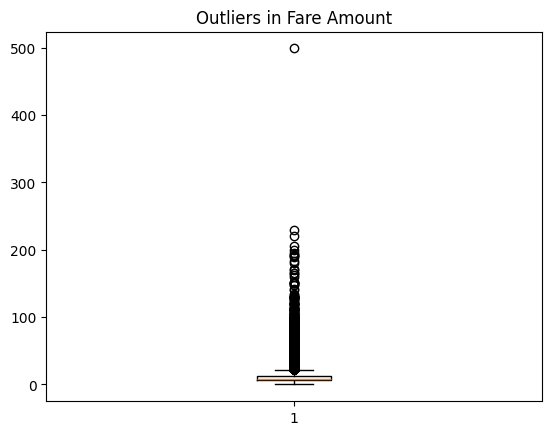

In [34]:
# Step 5: Identify Outliers
plt.boxplot(df['fare_amount'])
plt.title('Outliers in Fare Amount')
plt.show()

In [35]:
# Remove extreme values (outliers)
df = df[df['fare_amount'] < 100]

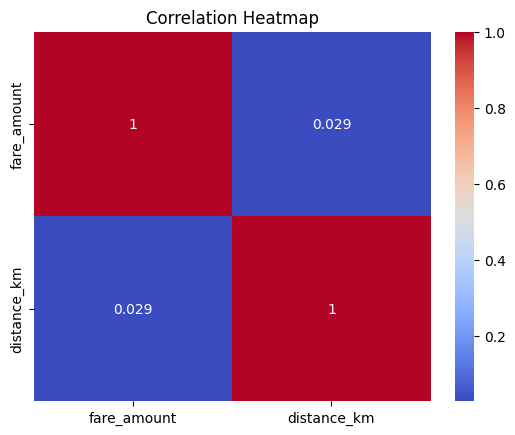

In [36]:
# Step 6: Correlation
sns.heatmap(df[['fare_amount', 'distance_km']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:

# Step 7: Split dataset
X = df[['distance_km']]  # independent variable
y = df['fare_amount']    # dependent variable

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Step 8: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 9: Prediction
y_pred = lr.predict(X_test)

In [40]:
# Step 10: Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.0008820283826936892
RMSE: 9.399447916054175
